# Imports for Code 1 and Code 2

In [1]:
from PIL import Image
import imageio as iio
import cv2
import math
import numpy as np
from matplotlib  import pyplot as plt
import qrcode

# ME

## Plot the images

In [2]:
arr1 = np.array([[0,255,0,255,0,255],
[255,0,255,0,255,0],
[0,255,0,255,0,255],[255,0,255,0,255,0]
,[0,255,0,255,0,255],[255,0,255,0,255,0]])
arr2 = np.array([[0,0,0,255,255,255],[255,255,255,0,0,0],[0,0,0,255,255,255],[0,0,0,255,255,255],[255,255,255,0,0,0],[0,0,0,255,255,255]])
arr3 = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[255,255,255,255,255,255],[255,255,255,255,255,255],[0,0,0,0,0,0],[0,0,0,0,0,0]])

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


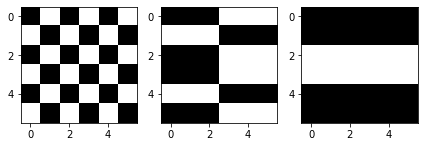

In [3]:
# Set the figure size
plt.rcParams["figure.autolayout"] = True
# Plot the data usingo imshow with gray colormap
fig, axs = plt.subplots(1,3)
axs[0].imshow(arr1, cmap='gray')
axs[1].imshow(arr2, cmap='gray')
axs[2].imshow(arr3, cmap='gray')
# Display the plot
plt.show()

## Code images

In [4]:
def code(image):
    repeating_counter, not_repeating_counter = 1,0
    coded_image= []
    not_repeating_vals=[]
    val = image[0]
    val_counter = 1
    for i in image[1:]:
        if(i==val):
            repeating_counter=repeating_counter+1
            if(repeating_counter >2 and not_repeating_counter>0):
                a = hex(not_repeating_counter)
                coded_image=np.append(coded_image, ["0" + a[2:].zfill(3)])
                coded_image=np.append(coded_image,not_repeating_vals)
                not_repeating_counter=0
                not_repeating_vals=[]
        else:
            if(repeating_counter>2):
                a = hex(repeating_counter)
                coded_image=np.append(coded_image, ["8" + a[2:].zfill(3), hex(val)[2:].zfill(4)])
                repeating_counter=1
            else:
                repeating_counter = 1
                not_repeating_counter=not_repeating_counter+1
                not_repeating_vals.append(hex(val)[2:].zfill(4))
        val = i
    if(repeating_counter>2):
        a = hex(repeating_counter)
        coded_image=np.append(coded_image, ["8" + a[2:].zfill(3), hex(val)[2:].zfill(4)])
    elif(not_repeating_counter>0):
        a = hex(not_repeating_counter)
        coded_image=np.append(coded_image, [ "0" + a[2:].zfill(3)])
        coded_image=np.append(coded_image,not_repeating_vals)
    else:
        coded_image=np.append(coded_image, ["0" + a[2:].zfill(3)],hex(val)[2:].zfill(4),hex(val)[2:].zfill(4))
    return coded_image

In [5]:
def encode(image, file_name='compressed_image.txt', bits=15):

    count_list = []
    count = 0
    prev = None
    fimage = image.flatten()
    size = 2**(bits+1) - 2**bits #32768 = 8000H
    
    for pixel in fimage:
        
        if prev == None:
            prev = pixel 
            count += 1
        else:
            if prev != pixel: # The current pixel is different from the previous one
                if count >= 3:
                    count_list.append((size+count, [prev]))
                else:
                    if count_list == []:
                        count_list.append((count, [prev]*count))
                    else: 
                        c, color = count_list[-1]
                        if c > size: 
                            count_list.append((count, [prev]*count))
                        else:
                            if c+count <= (2**bits)-1: # Make sure that we didn't use all of the 15 bits reserved for the color's sequence length 
                                count_list[-1] = (c+count, color+[prev]*count)
                            else:
                                count_list.append((count, [prev]*count))
                prev = pixel
                count = 1
            else: # The current pixel is like the previous one
                if count < (2**bits)-1: # Make sure that we didn't use all of the 15 bits reserved for the number of repetitions 
                    count += 1                    
                else:
                    count_list.append((size+count, [prev]))
                    prev = pixel
                    count = 1

    if count >= 3:
        count_list.append((size+count, [prev]))
    else:
        c, color = count_list[-1]
        if c > size:
            count_list.append((count, [prev]*count))
        else:
            if c+count <= (2**bits)-1:
                count_list[-1] = (c+count, color+[prev]*count)
            else:
                count_list.append((count, [prev]*count))

    # Hexa encoding
    with open(file_name,"w") as file:
        hexa_encoded = ",".join(map(lambda x: "{0:04x}".format(x[0])+",".join(map(lambda y: "{0:02x}".format(y), x[1])), count_list))
        """ hexa_encoded = ""
        for count, colors in count_list:
            hexa_encoded += "{0:04x}".format(count)
            for color in colors:
                hexa_encoded += "{0:02x}".format(color) """
        file.write(hexa_encoded)
        
    # Compression rate
    rate = (1-(len(hexa_encoded)/2)/len(fimage))*100
    arr = []
    i=0
    while(i<len(hexa_encoded)):
        arr.append(hexa_encoded[i:i+4])
        i = i+4
    return hexa_encoded

In [6]:
arr1_coded = encode(arr1)
arr2_coded = encode(arr2)
arr3_coded = encode(arr3)

In [7]:
arr1_coded, arr2_coded, arr3_coded

('002400,ff,00,ff,00,ff,ff,00,ff,00,ff,00,00,ff,00,ff,00,ff,ff,00,ff,00,ff,00,00,ff,00,ff,00,ff,ff,00,ff,00,ff,00',
 '800300,8006ff,800600,8003ff,800300,8006ff,800600,8003ff',
 '800c00,800cff,800c00')

In [8]:
arr1_coded = code(arr1.flatten())
arr2_coded = code(arr2.flatten())
arr3_coded = code(arr3.flatten())

In [9]:
arr1_coded, arr2_coded, arr3_coded

(array(['001e', '0000', '00ff', '0000', '00ff', '0000', '00ff', '0000',
        '00ff', '0000', '00ff', '0000', '00ff', '0000', '00ff', '0000',
        '00ff', '0000', '00ff', '0000', '00ff', '0000', '00ff', '0000',
        '00ff', '0000', '00ff', '0000', '00ff', '0000', '00ff'],
       dtype='<U32'),
 array(['8003', '0000', '8006', '00ff', '8006', '0000', '8003', '00ff',
        '8003', '0000', '8006', '00ff', '8006', '0000', '8003', '00ff'],
       dtype='<U32'),
 array(['800c', '0000', '800c', '00ff', '800c', '0000'], dtype='<U32'))

In [10]:
arr1_coded = ['0024', '00', 'FF', '00' ,'FF','00','FF','FF','00','FF','00',
'FF','00','00','FF','00','FF','00','FF','FF','00','FF','00','FF','00','00','FF', 
'00','FF','00','FF','FF','00','FF','00','FF','00'
]

In [11]:
def decode(coded_image):
    i=0
    decoded_image = []
    while (i<len(coded_image)):
        binary_value = str(bin(int(coded_image[i], 16)))[2:].zfill(16)
        if(binary_value[0] == "1"):
            values_to_add = int(binary_value[1:], 2)
            decoded_image = decoded_image +  [coded_image[i+1]] * values_to_add
            i=i+2
        else:
            counter = int(binary_value, 2)
            decoded_image = decoded_image + [value for value in coded_image[i+1:i+counter+1]]
            i =  counter + 1
    return np.array(decoded_image)

In [12]:
decode(arr1_coded)

array(['00', 'FF', '00', 'FF', '00', 'FF', 'FF', '00', 'FF', '00', 'FF',
       '00', '00', 'FF', '00', 'FF', '00', 'FF', 'FF', '00', 'FF', '00',
       'FF', '00', '00', 'FF', '00', 'FF', '00', 'FF', 'FF', '00', 'FF',
       '00', 'FF', '00'], dtype='<U2')

In [24]:
arr1_decoded = np.array([int(pixel, 16) for pixel in decode(arr1_coded)]).reshape(6,6)
def decode(coded_image):
    i=0
    decoded_image = []
    while (i<len(coded_image)):
        binary_value = str(bin(int(coded_image[i], 16)))[2:].zfill(16)
        if(binary_value[0] == "1"):
            values_to_add = int(binary_value[1:], 2)
            decoded_image = decoded_image +  [coded_image[i+1]] * values_to_add
            i=i+2
        else:
            counter = int(binary_value, 2)
            decoded_image = decoded_image + [value for value in coded_image[i+1:i+counter+1]]
            i =  counter + 1
    return np.array(decoded_image) 
arr2_decoded = np.array([int(pixel, 16) for pixel in decode(arr2_coded)]).reshape(6,6)
arr3_decoded = np.array([int(pixel, 16) for pixel in decode(arr3_coded)]).reshape(6,6)

In [25]:

arr1_decoded, arr2_decoded, arr3_decoded

(array([[  0, 255,   0, 255,   0, 255],
        [255,   0, 255,   0, 255,   0],
        [  0, 255,   0, 255,   0, 255],
        [255,   0, 255,   0, 255,   0],
        [  0, 255,   0, 255,   0, 255],
        [255,   0, 255,   0, 255,   0]]),
 array([[  0,   0,   0, 255, 255, 255],
        [255, 255, 255,   0,   0,   0],
        [  0,   0,   0, 255, 255, 255],
        [  0,   0,   0, 255, 255, 255],
        [255, 255, 255,   0,   0,   0],
        [  0,   0,   0, 255, 255, 255]]),
 array([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]]))

In [26]:
arr1 - arr1_decoded, arr2 - arr2_decoded, arr3 - arr3_decoded

(array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

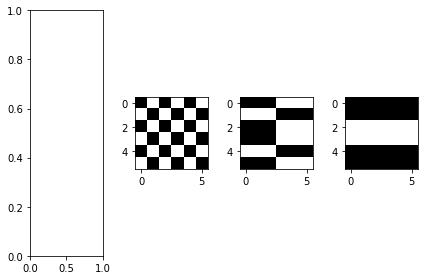

In [27]:
# Set the figure size
plt.rcParams["figure.autolayout"] = True
# Plot the data using imshow with gray colormap
fig, axs = plt.subplots(1,4)
axs[1].imshow(arr1_decoded, cmap='gray')
axs[2].imshow(arr2_decoded, cmap='gray')
axs[3].imshow(arr3_decoded, cmap='gray')
# Display the plot
plt.show()

In [28]:
QRcode = qrcode.make("".join(arr2_coded))
QRcode.save("qrcode.png")

In [29]:
result = decode(Image.open("qrcode.png"))
print(result)

TypeError: object of type 'PngImageFile' has no len()